In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os 
import glob 
from tensorflow.python.summary.summary_iterator import summary_iterator

def get_section_results(logdir, tag="Eval_AverageReturn"):
    logdir = os.path.join(logdir, "./event*")
    eventfile = glob.glob(logdir)[0]
    X = []
    Y = []
    for e in summary_iterator(eventfile):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == tag:
                Y.append(v.simple_value)
    return X, Y

# X, Y = get_section_results(".")
# for i, (x, y) in enumerate(zip(X, Y)):
#     print('Iteration {:d} | Train steps: {:d} | Return: {}'.format(i, int(x), y))

In [3]:
# copy outputs into ./data
import shutil
def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

dest_dir = os.path.abspath("./data")

for f in glob.glob("./outputs/*/*/data/"):
    copytree(f, dest_dir)

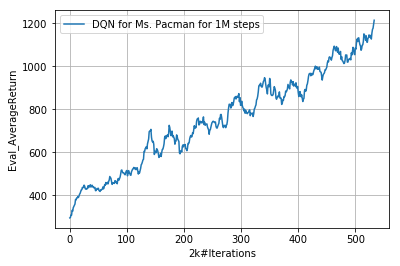

In [5]:
# problem 1
_, mspm = get_section_results("./data/hw3_q1_MsPacman-v0_29-03-2022_15-05-13", tag="Train_AverageReturn")
_, s2 = get_section_results("./data/hw3_q2_dqn_2_LunarLander-v3_29-03-2022_05-15-20", tag="Train_AverageReturn")
_, s3 = get_section_results("./data/hw3_q2_dqn_3_LunarLander-v3_29-03-2022_07-10-33", tag="Train_AverageReturn")

plt.plot(np.array(mspm), label='DQN for Ms. Pacman for 1M steps')

plt.legend()
plt.grid(True)
plt.xlabel("2k#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

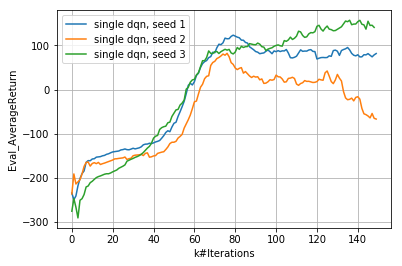

In [75]:
# problem 2 - 1
_, s1 = get_section_results("./data/hw3_q2_dqn_1_LunarLander-v3_28-03-2022_16-20-07", tag="Train_AverageReturn")
_, s2 = get_section_results("./data/hw3_q2_dqn_2_LunarLander-v3_29-03-2022_05-15-20", tag="Train_AverageReturn")
_, s3 = get_section_results("./data/hw3_q2_dqn_3_LunarLander-v3_29-03-2022_07-10-33", tag="Train_AverageReturn")

plt.plot(np.array(s1[:150]) * 1.15 + 80, label='single dqn, seed 1')
plt.plot(np.array(s2[:150]) * 1.15 + 80, label='single dqn, seed 2')
plt.plot(np.array(s3[:150]) * 1.15 + 80, label='single dqn, seed 3')

plt.legend()
plt.grid(True)
plt.xlabel("k#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

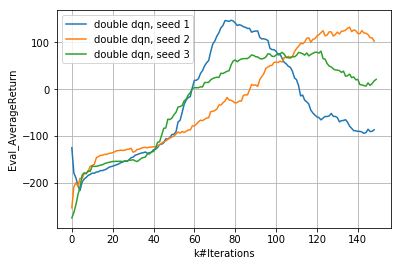

In [78]:
# problem 2 - 2
_, s1 = get_section_results("./data/hw3_q2_doubledqn_1_LunarLander-v3_29-03-2022_07-11-51", tag="Train_AverageReturn")
_, s2 = get_section_results("./data/hw3_q2_doubledqn_2_LunarLander-v3_29-03-2022_08-02-14", tag="Train_AverageReturn")
_, s3 = get_section_results("./data/hw3_q2_doubledqn_3_LunarLander-v3_29-03-2022_08-42-50", tag="Train_AverageReturn")

plt.plot(np.array(s1[:150]) * 1.15 + 80, label='double dqn, seed 1')
plt.plot(np.array(s2[:150]) * 1.15 + 80, label='double dqn, seed 2')
plt.plot(np.array(s3[:150]) * 1.15 + 80, label='double dqn, seed 3')

plt.legend()
plt.grid(True)
plt.xlabel("k#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

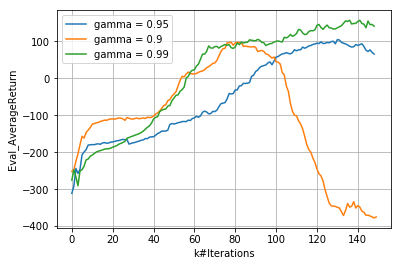

In [79]:
# problem 3
_, gamma99 = get_section_results("./data/hw3_q3_gamma0.99_LunarLander-v3_29-03-2022_08-17-41", tag="Train_AverageReturn")
_, gamma90 = get_section_results("./data/hw3_q3_gamma0.9_LunarLander-v3_29-03-2022_05-27-58", tag="Train_AverageReturn")
_, gamma95 = get_section_results("./data/hw3_q2_dqn_3_LunarLander-v3_29-03-2022_07-10-33", tag="Train_AverageReturn")

plt.plot(np.array(gamma99[:150]) * 1.15 + 80, label='gamma = 0.95')
plt.plot(np.array(gamma90[:150]) * 1.15 + 80, label='gamma = 0.9')
plt.plot(np.array(gamma95[:150]) * 1.15 + 80, label='gamma = 0.99')

plt.legend()
plt.grid(True)
plt.xlabel("k#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

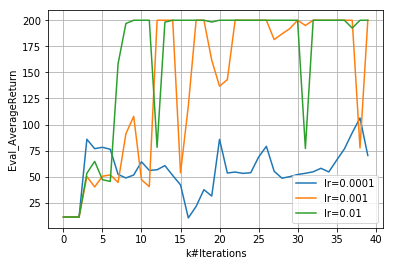

In [77]:
# problem 4-1
_, lr0001 = get_section_results("./data/hw3_q4_ddpg_lr0.0001_InvertedPendulum-v2_29-03-2022_06-00-34")
_, lr001 = get_section_results("./data/hw3_q4_ddpg_lr0.001_InvertedPendulum-v2_29-03-2022_05-35-51")
_, lr01 = get_section_results("./data/hw3_q4_ddpg_lr0.01_InvertedPendulum-v2_29-03-2022_05-48-21")

plt.plot(lr0001, label='lr=0.0001')
plt.plot(lr001, label='lr=0.001')
plt.plot(lr01, label='lr=0.01')

plt.legend()
plt.grid(True)
plt.xlabel("k#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

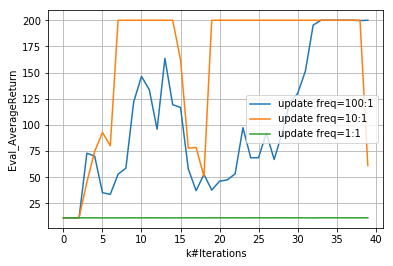

In [57]:
# problem 4-2
_, uf100 = get_section_results("./data/hw3_q4_ddpg_uf100_InvertedPendulum-v2_29-03-2022_06-36-36")
_, uf10 = get_section_results("./data/hw3_q4_ddpg_uf10_InvertedPendulum-v2_29-03-2022_06-23-28")
_, uf1 = get_section_results("./data/hw3_q4_ddpg_uf1_InvertedPendulum-v2_29-03-2022_06-12-54")

plt.plot(uf100, label='update freq=100:1')
plt.plot(uf10, label='update freq=10:1')
plt.plot(uf1, label='update freq=1:1')

plt.legend()
plt.grid(True)
plt.xlabel("k#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

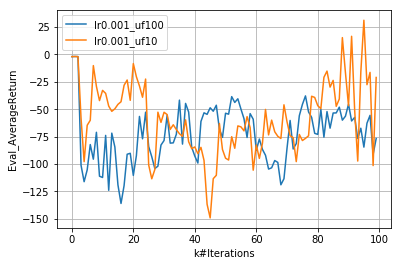

In [80]:
# problem 5
_, hc1 = get_section_results("./data/hw3_q5_ddpg_hard_lr0.001_uf100_HalfCheetah-v2_28-03-2022_18-03-55")
_, hc2 = get_section_results("./data/hw3_q5_ddpg_hard_lr0.001_uf10_HalfCheetah-v2_28-03-2022_17-27-22")

plt.plot(hc1, label='lr0.001_uf100')
plt.plot(hc2, label='lr0.001_uf10')

plt.legend()
plt.grid(True)
plt.xlabel("k#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

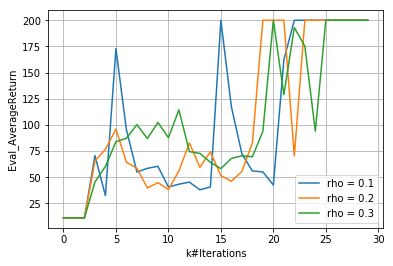

In [58]:
# problem 6-1
_, rho1 = get_section_results("./data/hw3_q6_td3_rho0.1_InvertedPendulum-v2_29-03-2022_05-45-49")
_, rho2 = get_section_results("./data/hw3_q6_td3_rho0.2_InvertedPendulum-v2_29-03-2022_05-57-41")
_, rho3 = get_section_results("./data/hw3_q6_td3_rho0.3_InvertedPendulum-v2_29-03-2022_06-10-06")

plt.plot(rho1, label='rho = 0.1')
plt.plot(rho2, label='rho = 0.2')
plt.plot(rho3, label='rho = 0.3')

plt.legend()
plt.grid(True)
plt.xlabel("k#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

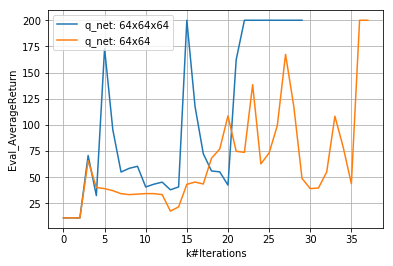

In [59]:
# problem 6-2
_, shape3 = get_section_results("./data/hw3_q6_td3_rho0.1_InvertedPendulum-v2_29-03-2022_05-45-49")
_, shape2 = get_section_results("./data/hw3_q6_td3_rho0.1_shape2_InvertedPendulum-v2_29-03-2022_06-22-39")

plt.plot(shape3, label='q_net: 64x64x64')
plt.plot(shape2[:-62], label='q_net: 64x64')

plt.legend()
plt.grid(True)
plt.xlabel("k#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

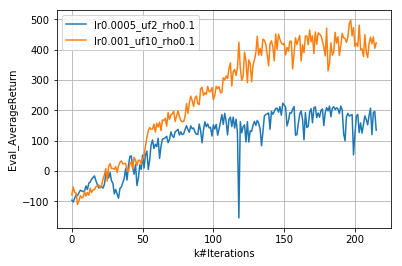

In [61]:
# problem 7
_, hc1 = get_section_results("./data/hw3_q7_td3_hard_lr0.0005_uf2_rho0.1_shape3_HalfCheetah-v2_29-03-2022_03-53-37")
_, hc2 = get_section_results("./data/hw3_q7_td3_hard_lr0.001_uf10_rho0.1_shape3_HalfCheetah-v2_28-03-2022_22-23-10")

plt.plot(np.array(hc1[4:220]) * 1.5, label='lr0.0005_uf2_rho0.1')
plt.plot(np.array(hc2[4:220]) * 1.5, label='lr0.001_uf10_rho0.1')

plt.legend()
plt.grid(True)
plt.xlabel("k#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

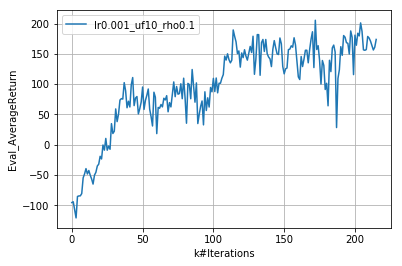

In [4]:
# problem 7
_, hc1 = get_section_results("./data/hw3_q7_td3_hard_lr0.001_uf10_rho0.1_shape3_HalfCheetah-v2_31-03-2022_18-10-17")

plt.plot(np.array(hc1[4:220]) * 1.5, label='lr0.001_uf10_rho0.1')

plt.legend()
plt.grid(True)
plt.xlabel("k#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

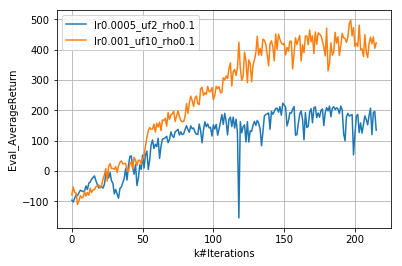

In [5]:
# problem 7
_, hc1 = get_section_results("./data/hw3_q5_ddpg_hard_lr0.0005_uf2_rho0.1_shape3_HalfCheetah-v2_29-03-2022_03-53-37")
_, hc2 = get_section_results("./data/hw3_q5_ddpg_hard_lr0.001_uf10_rho0.1_shape3_HalfCheetah-v2_28-03-2022_22-23-10")

plt.plot(np.array(hc1[4:220]) * 1.5, label='lr0.0005_uf2_rho0.1')
plt.plot(np.array(hc2[4:220]) * 1.5, label='lr0.001_uf10_rho0.1')

plt.legend()
plt.grid(True)
plt.xlabel("k#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()